<a href="https://colab.research.google.com/github/Mohinee29/Flight_Price/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Importing Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from google.colab import files
from sklearn.ensemble import ExtraTreesRegressor
import io

import warnings
warnings.filterwarnings('ignore')

#TRAINING DATA SET


In [ ]:
#Reading Training data set 
df_train=pd.read_excel('https://raw.githubusercontent.com/Mohinee29/Flight_Price/main/Data_Train.xlsx')
df_train.head(10)

In [ ]:
df_train.info()  #Print summary of the training data, contaning the data types of columns.

In [ ]:
df_train.describe() # returns the statistical summary of the dataframe

In [ ]:
df_train.shape #shape i.e number of rows and columns in the data frame.

In [ ]:
df_train.isnull().sum() #gives the coulumns containg null value and the count of null values in those columns.

In [ ]:
df_train.dropna(inplace=True) # drops the null values and checks again for null values.
df_train.isnull().sum()

In [ ]:
df_train["Journey_day"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day   #Converting Date of journey column from object to date time data type and extracting day and storing.
df_train["Journey_month"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.month #Extracting month from Date of journey and storing in separate column
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)  # Dropping Date of journey column
df_train.head()

In [ ]:
# Extracting departure hour and departure minute from Dept Time and storing it in two separate columns. Dropping Dept Time column.

df_train["Departure_hour"] = pd.to_datetime(df_train.Dep_Time).dt.hour
df_train["Departure_minute"] = pd.to_datetime(df_train.Dep_Time).dt.minute
df_train.drop(["Dep_Time"], axis = 1, inplace = True)
df_train.head()

In [ ]:
# Extracting arrival hour and arrival minute from arrival Time and storing it in two separate columns. Dropping arrival Time column.

df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["Arrival_minute"] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)
df_train.head()

In [ ]:
#Processing Duration column.

duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hours or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding duration_hours and duration_mins list to train_data dataframe

df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

df_train.drop(["Duration"], axis = 1, inplace = True) #drop duration columns

df_train.head()

In [ ]:
df_train["Airline"].value_counts()

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding and storing in separte dataframe

Airline = df_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

In [ ]:
#Airline Vs Price analysis

plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df_train.sort_values('Price',ascending=False))

In [ ]:
#Source Vs Price Analysis

df_train["Source"].value_counts()
sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [15]:
# As source is Nominal Categorical data we will perform OneHotEncoding and storing in separte dataframe

Source = df_train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
#Destination Vs Price Analysis

df_train["Destination"].value_counts()
sns.catplot(y = "Price", x = "Destination", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
## As Destination is Nominal Categorical data we will perform OneHotEncoding and storing in separte dataframe

Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

In [18]:
# Additional info column contains more than 70 percent info as no info so dropping this column. Route column is related with total stops column.

df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True) 

In [ ]:
df_train["Total_Stops"].value_counts()


In [ ]:
#Total_stops Vs Price Analysis

plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df_train.sort_values('Price',ascending=False))

In [ ]:
# encoding Total stops

df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_train.head()

In [ ]:
train_data = pd.concat([df_train, Airline, Source, Destination], axis = 1) #concat the encoded data frame with original data frame
train_data.head()

In [ ]:
train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True) #Dropping airline, source and destination column form data frame.
train_data.head()

In [ ]:
train_data.shape

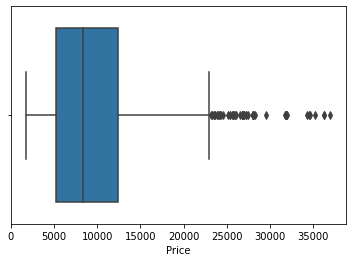

In [42]:
sns.boxplot(x='Price',data=train_data.sort_values('Price',ascending=False))  #Checking for outliers in Price column.

In [25]:
#Replacing outliers in price column with median price.

train_data['Price']=np.where(train_data['Price']>=40000,train_data['Price'].median(),train_data['Price'])

In [ ]:
train_data.head()

#TESTING DATA SET


In [ ]:
df_test=pd.read_excel('https://raw.githubusercontent.com/Mohinee29/Flight_Price/main/Test_set.xlsx')
df_test.head()

In [ ]:
print("Test data Info")
print(df_test.info())

print()
print()

print("Null values :")
print("-"*75)
df_test.dropna(inplace = True)
print(df_test.isnull().sum())

# EDA

# Date_of_Journey
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)


# Categorical data encoding

print("Airline")
print("-"*75)
print(df_test["Airline"].value_counts())
Airline = pd.get_dummies(df_test["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(df_test["Source"].value_counts())
Source = pd.get_dummies(df_test["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(df_test["Destination"].value_counts())
Destination = pd.get_dummies(df_test["Destination"], drop_first = True)

# Additional_Info contains almost 70% no_info
# Route and Total_Stops are related to each other
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
test_data = pd.concat([df_test, Airline, Source, Destination], axis = 1)

test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", test_data.shape)

In [ ]:
test_data.head()

#Feature selection


In [ ]:
train_data.columns

In [ ]:
x= train_data.loc[:,train_data.columns!='Price'] #Replacing price which is dependent feature from training data and storing rest of the data in x
x

In [ ]:
y=train_data.loc[:, "Price"] #Storing Price in y
y

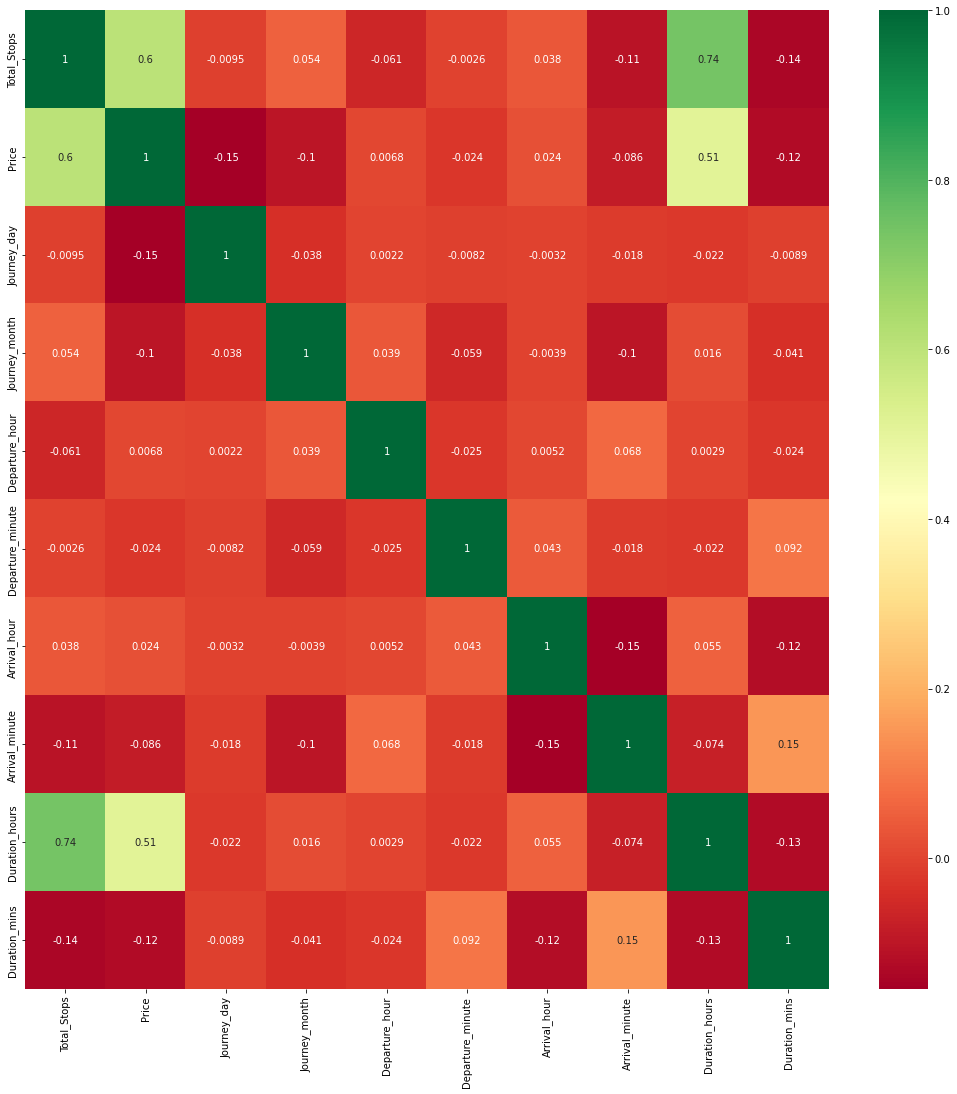

In [35]:
#correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
# Finding important features

selection = ExtraTreesRegressor()
selection.fit(x, y)

In [48]:
print(selection.feature_importances_)

[2.43192717e-01 1.54576834e-01 5.77006064e-02 2.29720074e-02
 2.19974303e-02 2.29884418e-02 1.98796754e-02 1.35336329e-01
 1.74110392e-02 1.54122771e-02 2.02283662e-03 1.67814511e-02
 1.56657962e-01 3.45959307e-04 2.29416882e-02 9.38706501e-04
 4.01086336e-03 1.04314282e-04 6.31726667e-03 9.68734503e-05
 5.92018965e-04 1.01397478e-02 3.71737885e-03 5.17253556e-03
 1.30214034e-02 1.37625436e-02 7.30277621e-03 5.40994935e-04
 2.40653225e-02]


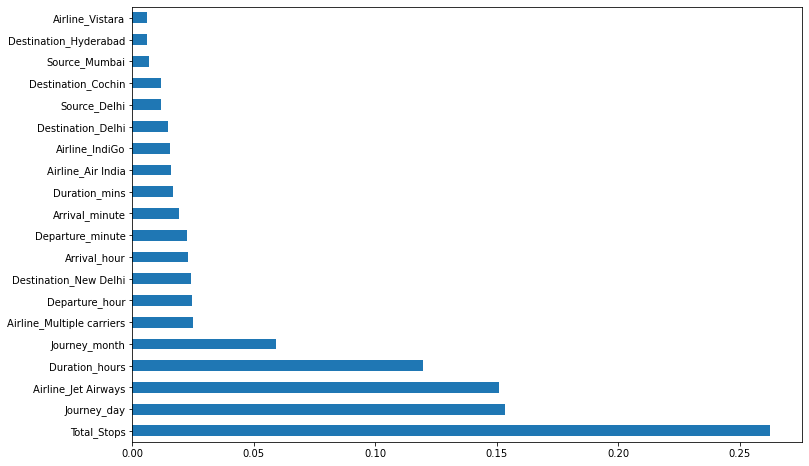

In [58]:
#Plotting the most important feature graph

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#Models


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [51]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [53]:
predict(RandomForestRegressor())

Model is: RandomForestRegressor()
Training score: 0.9511025526902285
Predictions are: [ 8425.67       17132.47333333 13723.20666667 ...  3821.38
  5700.96       10624.92      ]


r2 score is: 0.8334960127226325
MAE:1096.953259791864
MSE:2983410.6896699965
RMSE:1727.2552473997573


In [ ]:
predict(DecisionTreeRegressor())

In [ ]:
predict(GradientBoostingRegressor())

#Hyperparameter tuning



In [56]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(x_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 180}

In [57]:
# best parameter
rf_random.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 180}

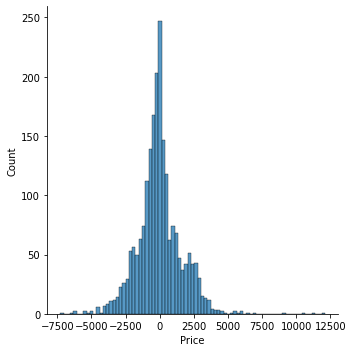

In [58]:
#predicting the values
prediction = rf_random.predict(x_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [61]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,prediction)

0.851300505838697